# Análisis exploratorio de datos - Educación

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
# Load data
path = '/work/covid-ec/data/processed/'

closures_education = pd.read_csv(path + 'closures_education.csv')
education_ec = pd.read_csv(path + 'education_ec.csv')

In [4]:
# Transform to datetime
closures_education['Date'] = pd.to_datetime(closures_education['Date'])

## UNESCO

### Visión general 

In [5]:
closures_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    624 non-null    datetime64[ns]
 1   Status  624 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.9+ KB


### Análisis unidimensional

Conteo de aparición de variables categóricas.

In [6]:
min_d = closures_education['Date'].min()
max_d = closures_education['Date'].max()
print('Inicial date: ' + str(min_d))
print('Final date: ' + str(max_d))
print('Total days: ' + str(max_d - min_d))

Inicial date: 2020-02-16 00:00:00
Final date: 2021-10-31 00:00:00
Total days: 623 days 00:00:00


In [7]:
closures_education['Status'].value_counts()

Closed due to COVID-19    282
Partially open            242
Academic break             74
Fully open                 26
Name: Status, dtype: int64

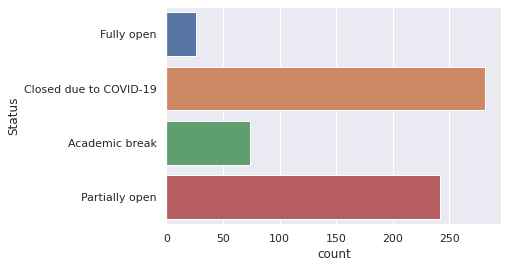

In [8]:
sns.countplot(data=closures_education, y='Status')
plt.show()

In [9]:
closures_education['Status'].value_counts(normalize=True)

Closed due to COVID-19    0.451923
Partially open            0.387821
Academic break            0.118590
Fully open                0.041667
Name: Status, dtype: float64

En los últimos 623 días los centros educativos pasaron cerrados un **45%** del tiempo.

### Análisis multidimensional

Progreso de los cierres de establecimientos educativos en el tiempo.

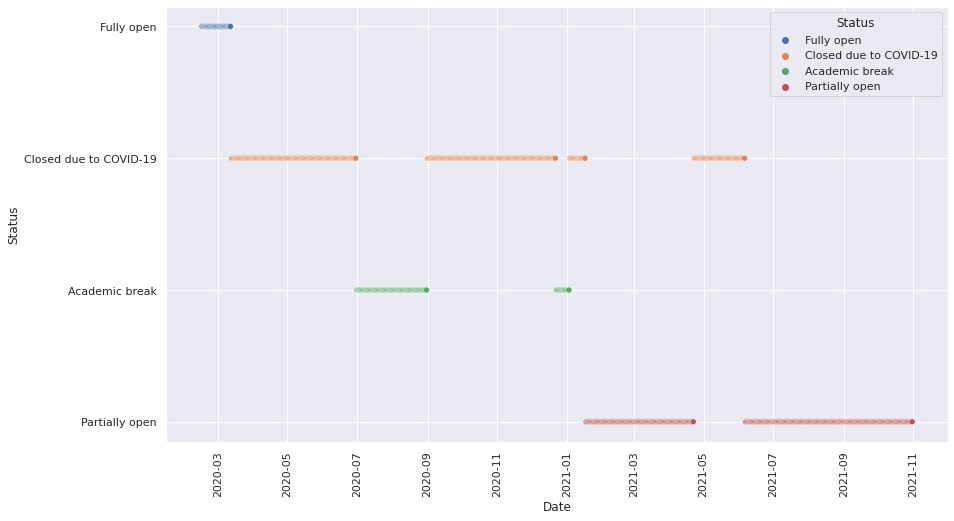

In [10]:
plt.figure(figsize=[14, 8])
sns.scatterplot(data=closures_education, x='Date', y='Status', hue='Status')
plt.xticks(rotation=90)
plt.show()

## Gobierno de Ecuador

### Visión general

In [11]:
education_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237963 entries, 0 to 237962
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Periodo            237963 non-null  object
 1   Provincia          237963 non-null  object
 2   Sostenimiento      237963 non-null  object
 3   Area               237963 non-null  object
 4   Modallidad         237963 non-null  object
 5   Jornada            237963 non-null  object
 6   Total_estudiantes  237963 non-null  int64 
 7   Promovidos         237963 non-null  int64 
 8   No promovidos      237963 non-null  int64 
 9   Abandono           237963 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.2+ MB


In [12]:
education_ec.describe()

,Total_estudiantes,Promovidos,No promovidos,Abandono
count,237963.000000,237963.000000,237963.000000,237963.000000
mean,213.634405,202.984174,3.555662,7.094569
std,394.706429,375.134354,18.559282,22.850699
min,1.000000,0.000000,0.000000,0.000000
25%,23.000000,21.000000,0.000000,0.000000
50%,61.000000,57.000000,0.000000,1.000000
75%,221.000000,210.000000,1.000000,5.000000
max,8838.000000,8573.000000,1856.000000,1408.000000


Hay más estudiantes que abandonan que no promovidos.

### Análisis unidimensional

In [13]:
# Número de periodos escolares
len(education_ec['Periodo'].unique())

12

Exploración de variables categóricas:

In [14]:
education_ec['Sostenimiento'].value_counts(normalize=True)


Fiscal           0.764384
Particular       0.185945
Fiscomisional    0.040737
Municipal        0.008934
Name: Sostenimiento, dtype: float64

In [15]:
education_ec['Area'].value_counts(normalize=True)

UrbanaINEC    0.548539
RuralINEC     0.451461
Name: Area, dtype: float64

In [16]:
education_ec['Modallidad'].value_counts(normalize=True)

Presencial                                                                                 0.973702
A Distancia                                                                                0.015280
Semipresencial                                                                             0.006673
Presencial y Semipresencial                                                                0.002047
Semipresencial y A Distancia                                                               0.000794
Presencial, Semipresencial y A Distancia                                                   0.000525
Radiofónica                                                                                0.000261
A Distancia y Red Virtual                                                                  0.000143
Virtual                                                                                    0.000109
Semipresencial y Radiofónica                                                               0.000092


In [17]:
education_ec['Jornada'].value_counts(normalize=True)

Matutina                          0.855280
Matutina y Vespertina             0.084459
Vespertina                        0.029332
Matutina, Vesperina y Nocturna    0.011939
Nocturna                          0.009863
Matutino y Nocturno               0.007665
Vespertina y Nocturna             0.001462
Name: Jornada, dtype: float64

### Análisis multidimensional

Evolución de promovidos, no promovidos y abandonos en los 12 años:

In [26]:
# Group values in a new DataFrame
students = pd.DataFrame()
students['total_students'] = education_ec.groupby('Periodo')['Total_estudiantes'].sum()
students['promoted'] = education_ec.groupby('Periodo')['Promovidos'].sum()
students['reproved'] = education_ec.groupby('Periodo')['No promovidos'].sum()
students['dropout'] = education_ec.groupby('Periodo')['Abandono'].sum()

In [39]:
# Percentages
students['p_promoted'] = students['promoted'] / students['total_students'] * 100
students['p_reproved'] = students['reproved'] / students['total_students'] * 100
students['p_dropout'] = students['dropout'] / students['total_students'] * 100

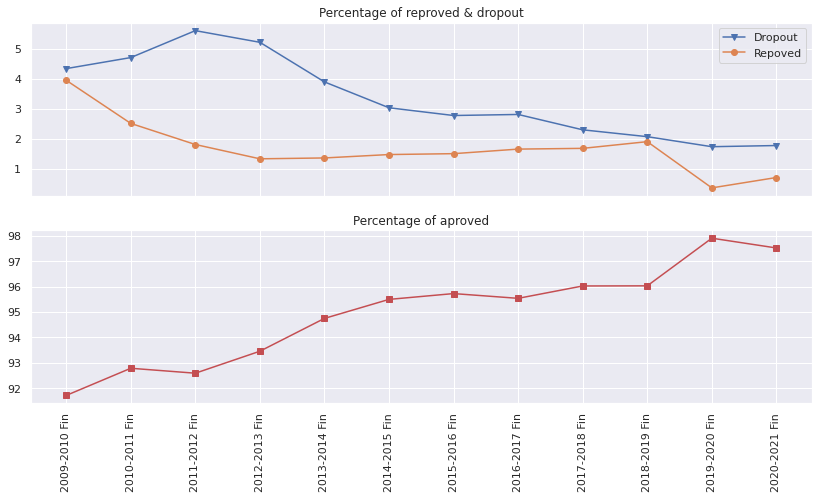

In [61]:
# Plot
fig, ax = plt.subplots(2, 1, sharex=True, figsize=[14,7])
ax[0].plot(students.index, students.p_dropout, marker='v', label='Dropout')
ax[0].plot(students.index, students.p_reproved, marker='o', label='Repoved')
ax[0].legend()
ax[0].set_title('Percentage of reproved & dropout')
ax[1].plot(students.index, students.p_promoted, marker='s', c='r')
ax[1].set_title('Percentage of aproved')

plt.xticks(rotation=90)
plt.show()

Si se compara como panorama general, se ve que ha ido mejorando la tasa de aprobación y disminuyendo la de reprobados y abandonos. Sin embargo, en el periodo '2020-2021', correspondiente a la pandemia, se ve como se detiene la evolución y hay un retroceso.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>